In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# pip install wordcloud

In [3]:
import json

with open('intents.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])
df

tag 
 patterns 
 responses 
 
 
 
 
 0 
 greeting 
 [Hi, Hey, Is anyone there?, Hi there, Hello, H... 
 [Hello there. Tell me how are you feeling toda... 
 
 
 1 
 morning 
 [Good morning] 
 [Good morning. I hope you had a good night's s... 
 
 
 2 
 afternoon 
 [Good afternoon] 
 [Good afternoon. How is your day going?] 
 
 
 3 
 evening 
 [Good evening] 
 [Good evening. How has your day been?] 
 
 
 4 
 night 
 [Good night] 
 [Good night. Get some proper sleep, Good night... 
 
 
 ... 
 ... 
 ... 
 ... 
 
 
 75 
 fact-28 
 [What do I do if I'm worried about my mental h... 
 [The most important thing is to talk to someon... 
 
 
 76 
 fact-29 
 [How do I know if I'm unwell?] 
 [If your beliefs , thoughts , feelings or beha... 
 
 
 77 
 fact-30 
 [How can I maintain social connections? What i... 
 [A lot of people are alone right now, but we d... 
 
 
 78 
 fact-31 
 [What's the difference between anxiety and str... 
 [Stress and anxiety are often used interchange... 
 
 
 79 
 fact-32 
 [What's the difference between sadness and dep... 
 [Sadness is a normal reaction to a loss, disap... 
 
 
 
 80 rows × 3 columns

In [4]:
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)

df = pd.DataFrame.from_dict(dic)
df

tag 
 patterns 
 responses 
 
 
 
 
 0 
 greeting 
 Hi 
 [Hello there. Tell me how are you feeling toda... 
 
 
 1 
 greeting 
 Hey 
 [Hello there. Tell me how are you feeling toda... 
 
 
 2 
 greeting 
 Is anyone there? 
 [Hello there. Tell me how are you feeling toda... 
 
 
 3 
 greeting 
 Hi there 
 [Hello there. Tell me how are you feeling toda... 
 
 
 4 
 greeting 
 Hello 
 [Hello there. Tell me how are you feeling toda... 
 
 
 ... 
 ... 
 ... 
 ... 
 
 
 227 
 fact-29 
 How do I know if I'm unwell? 
 [If your beliefs , thoughts , feelings or beha... 
 
 
 228 
 fact-30 
 How can I maintain social connections? What if... 
 [A lot of people are alone right now, but we d... 
 
 
 229 
 fact-31 
 What's the difference between anxiety and stress? 
 [Stress and anxiety are often used interchange... 
 
 
 230 
 fact-32 
 What's the difference between sadness and depr... 
 [Sadness is a normal reaction to a loss, disap... 
 
 
 231 
 fact-32 
 difference between sadness and depression 
 [Sadness is a normal reaction to a loss, disap... 
 
 
 
 232 rows × 3 columns

In [5]:
df['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
 'thanks', 'no-response', 'neutral-response', 'about', 'skill',
 'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
 'depressed', 'happy', 'casual', 'anxious', 'not-talking', 'sleep',
 'scared', 'death', 'understand', 'done', 'suicide', 'hate-you',
 'hate-me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
 'location', 'something-else', 'friends', 'ask', 'problem',
 'no-approach', 'learn-more', 'user-agree', 'meditation',
 'user-meditation', 'pandora-useful', 'user-advice',
 'learn-mental-health', 'mental-health-fact', 'fact-1', 'fact-2',
 'fact-3', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9',
 'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14', 'fact-15',
 'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-20', 'fact-21',
 'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26', 'fact-27',
 'fact-28', 'fact-29', 'fact-30', 'fact-31', 'fact-32'],
 dtype=object)

**Exploratory Data Analysis**

In [6]:
import plotly.graph_objects as go

In [7]:
df['pattern_count'] = df['patterns'].apply(lambda x: len(x))
df['response_count'] = df['responses'].apply(lambda x: len(x))
avg_pattern_count = df.groupby('tag')['pattern_count'].mean()
avg_response_count = df.groupby('tag')['response_count'].mean()

fig = go.Figure()
fig.add_trace(go.Bar(x=avg_pattern_count.index, y=avg_pattern_count.values, name='Average Pattern Count'))
fig.add_trace(go.Bar(x=avg_response_count.index, y=avg_response_count.values, name='Average Response Count'))
fig.update_layout(title='Pattern and Response Analysis', xaxis_title='Intents', yaxis_title='Average Count')
fig.show()

No patterns found for intent: no-response


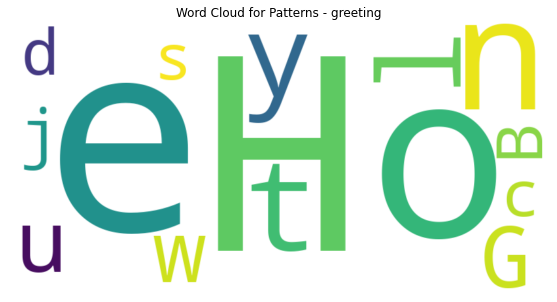

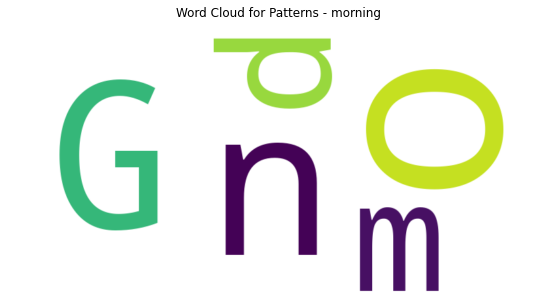

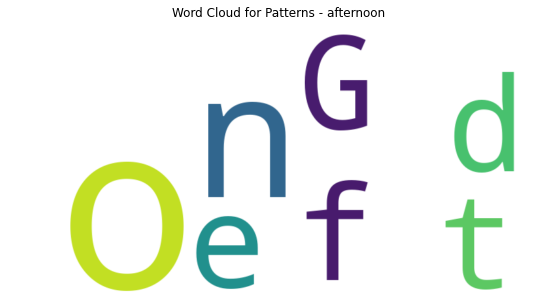

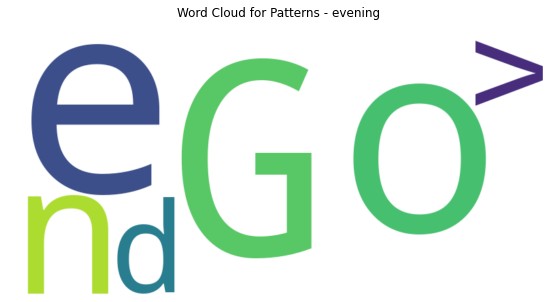

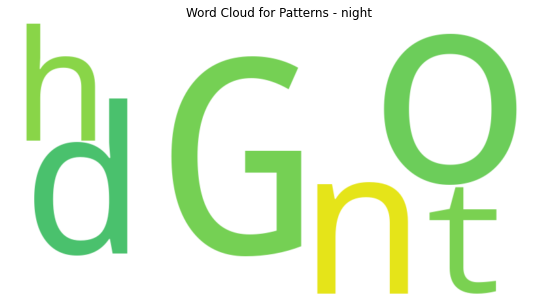

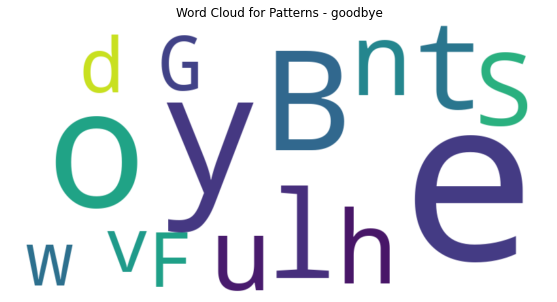

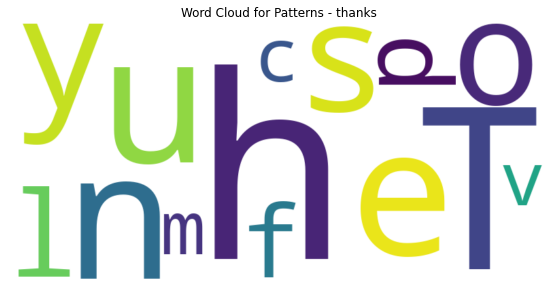

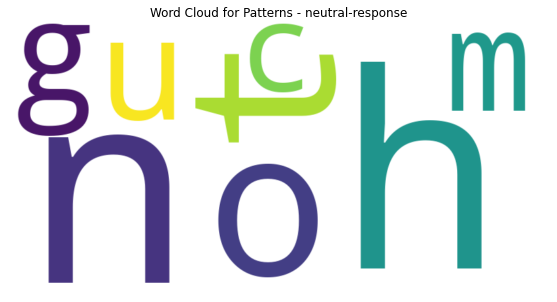

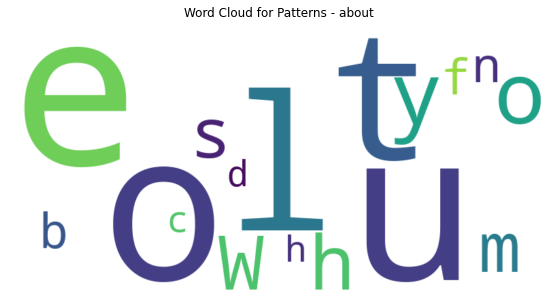

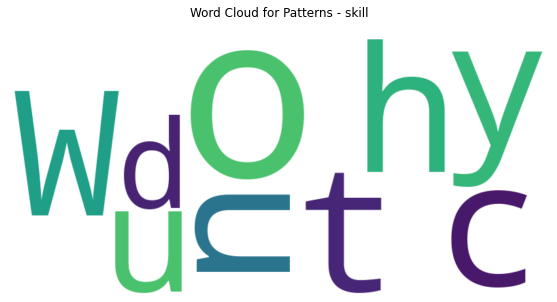

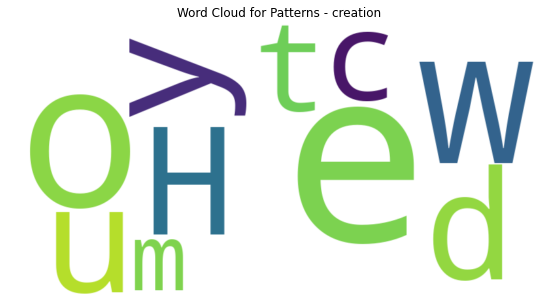

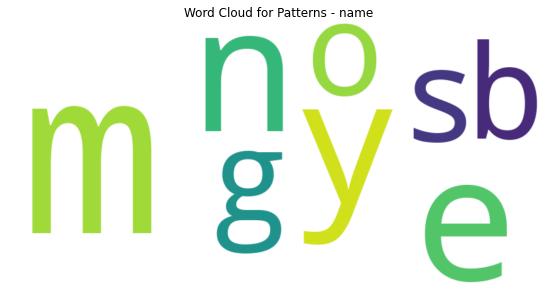

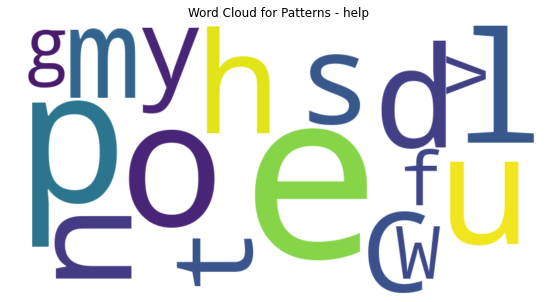

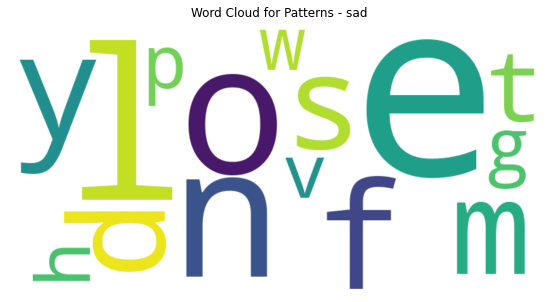

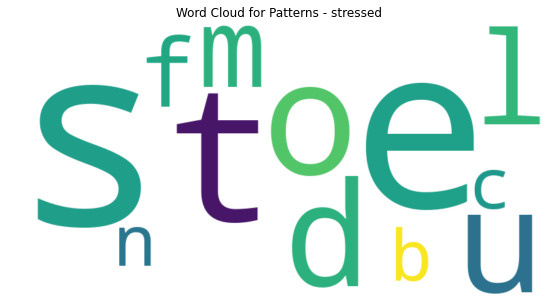

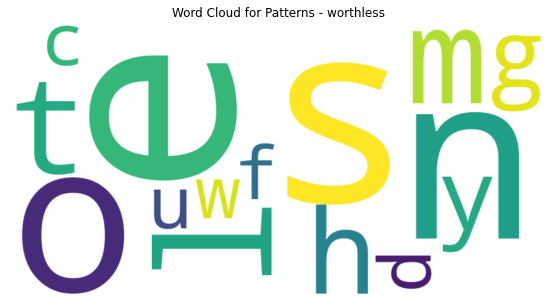

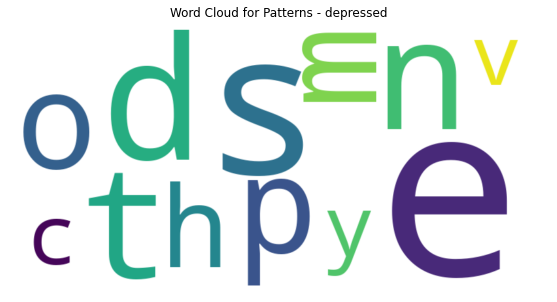

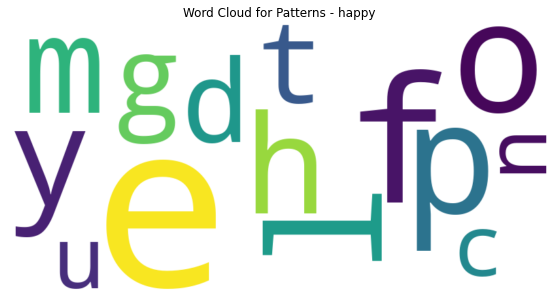

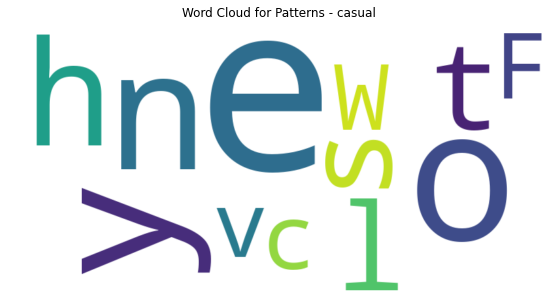

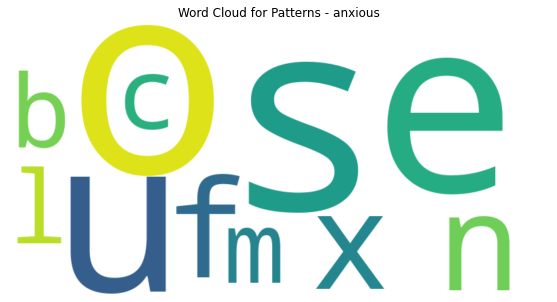

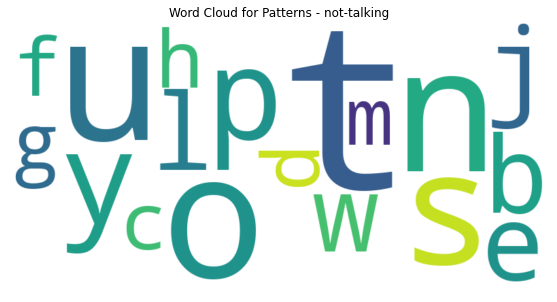

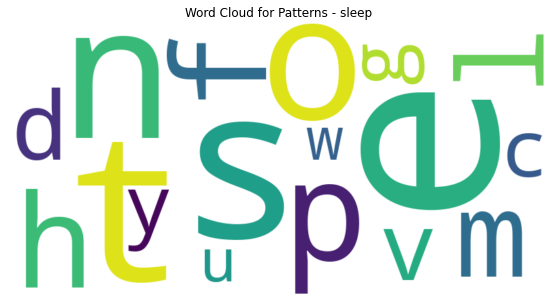

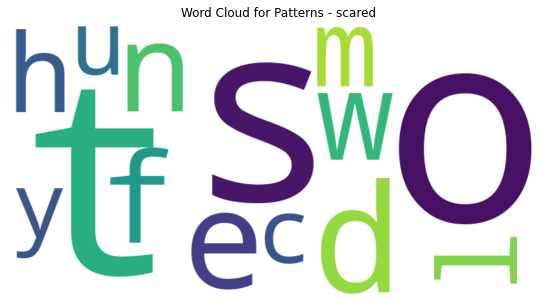

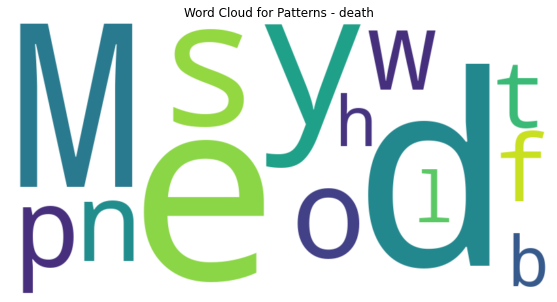

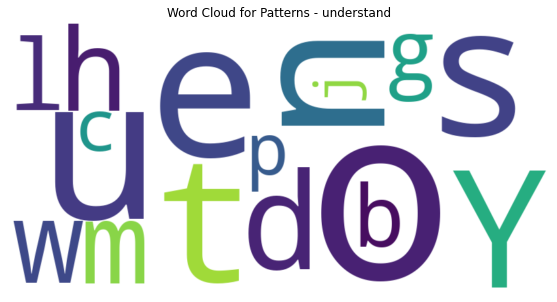

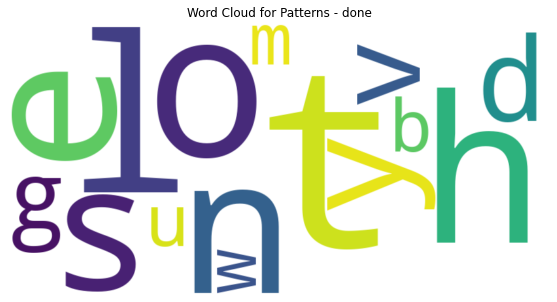

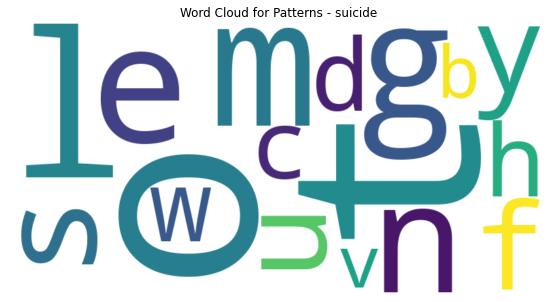

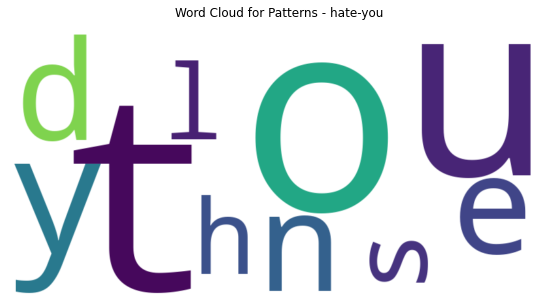

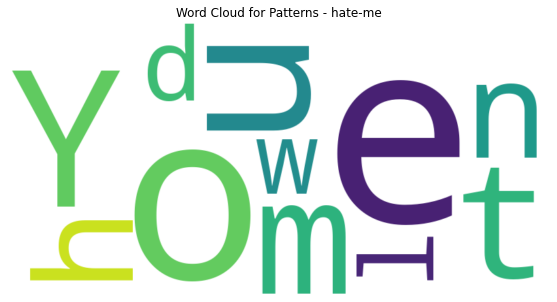

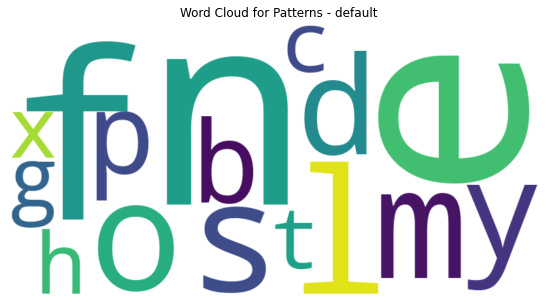

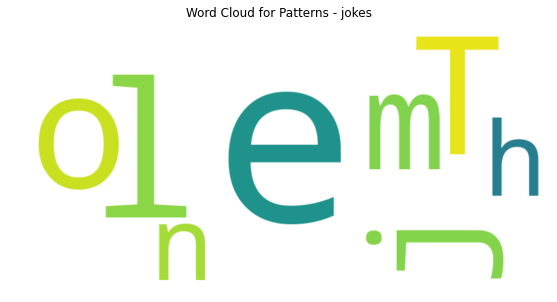

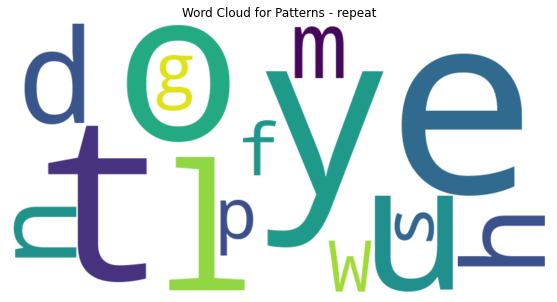

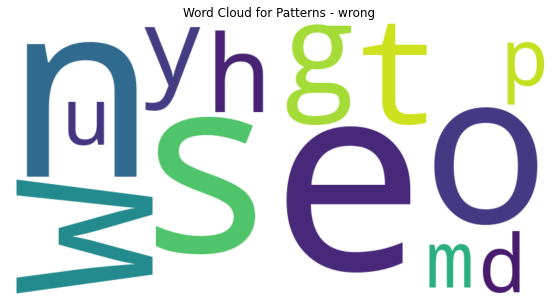

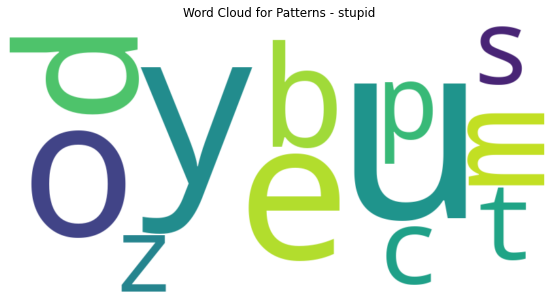

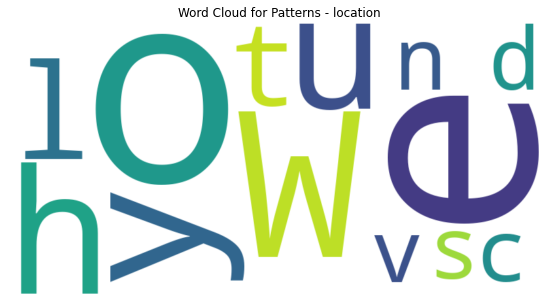

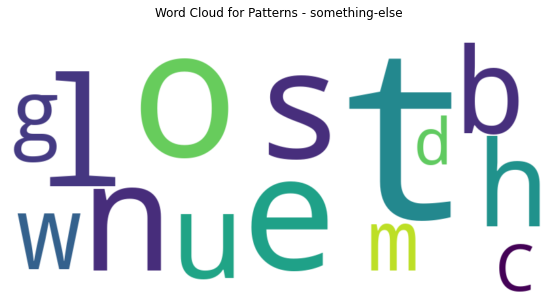

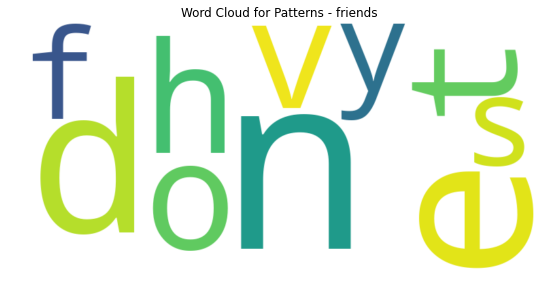

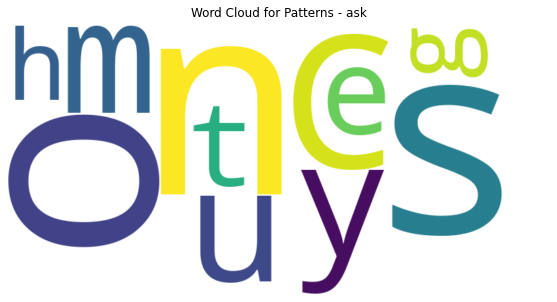

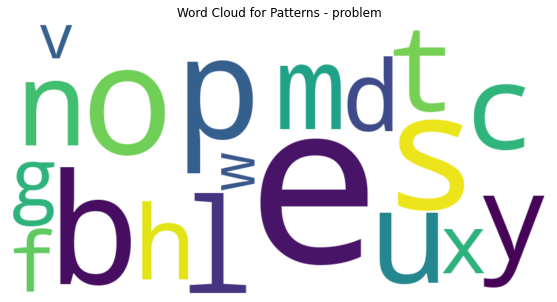

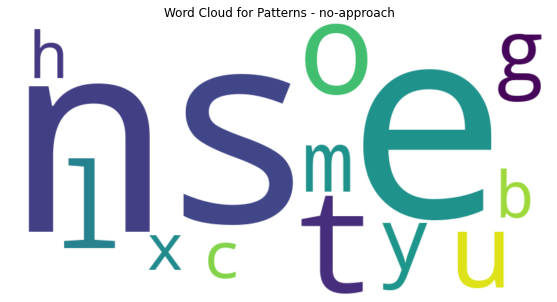

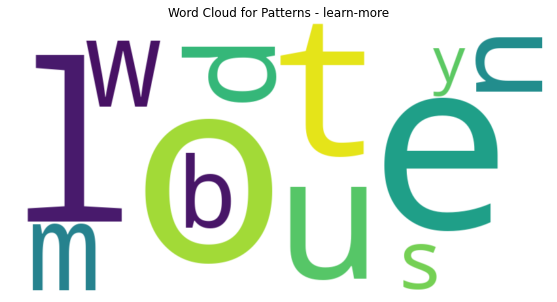

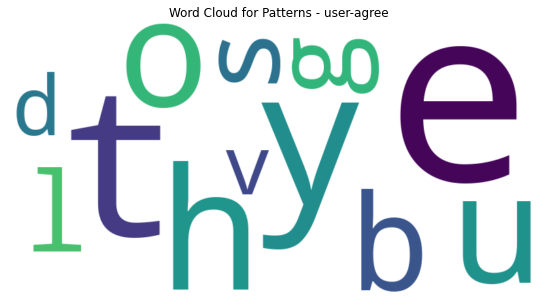

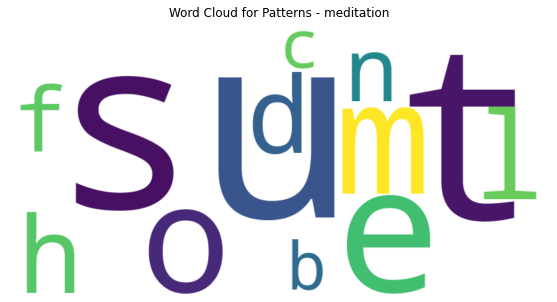

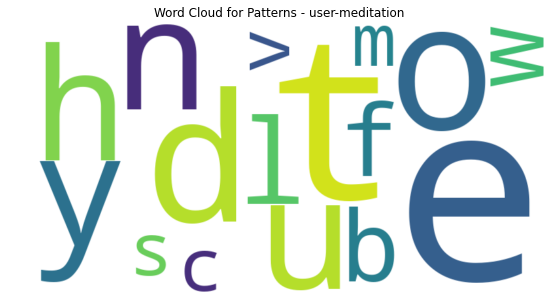

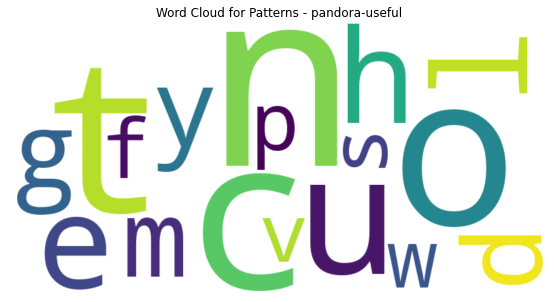

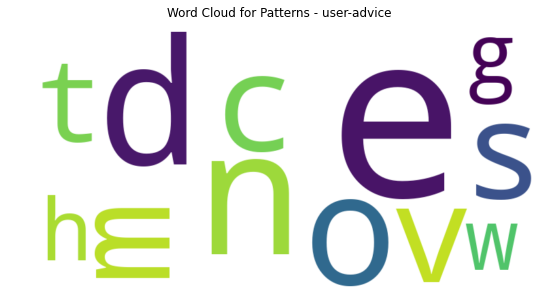

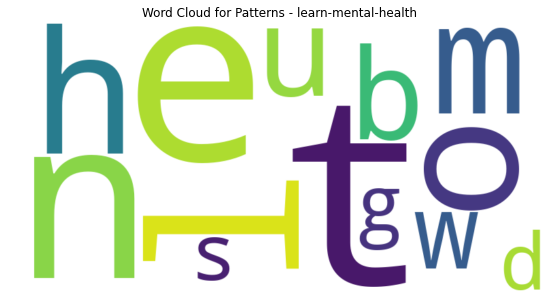

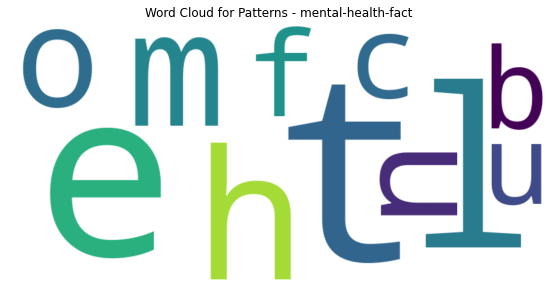

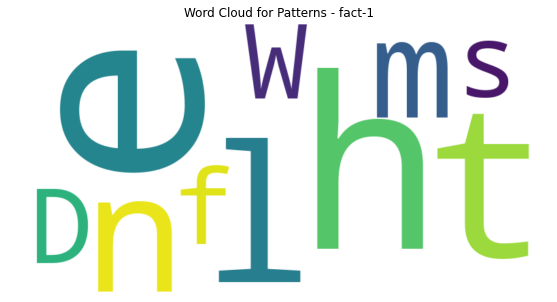

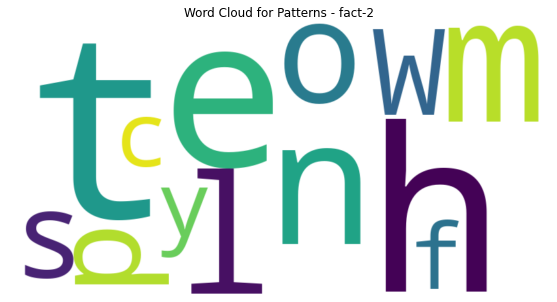

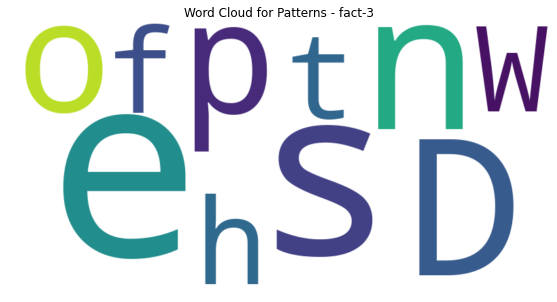

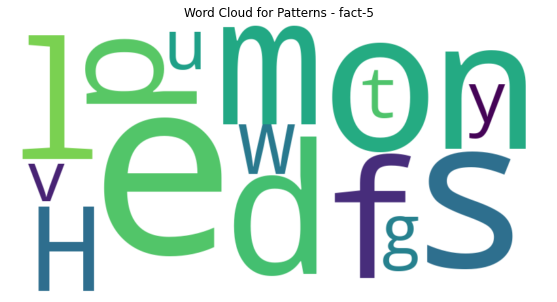

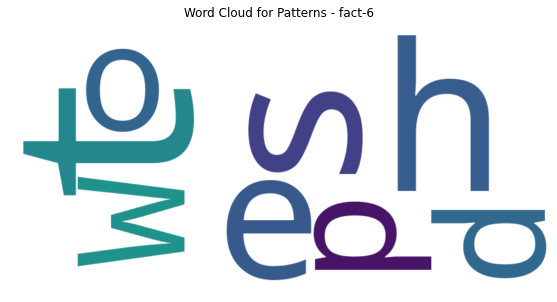

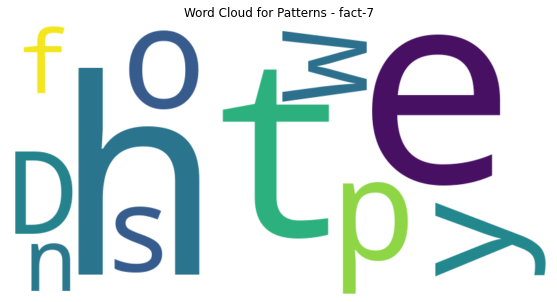

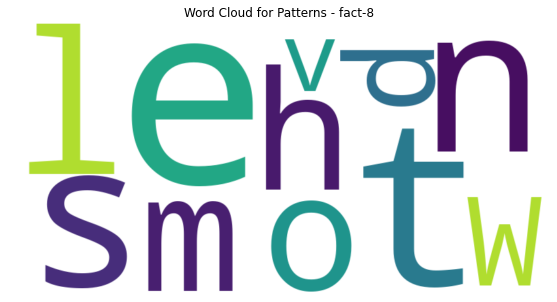

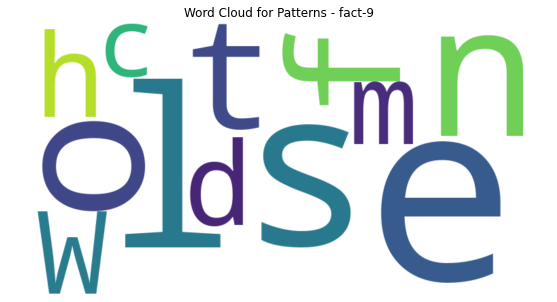

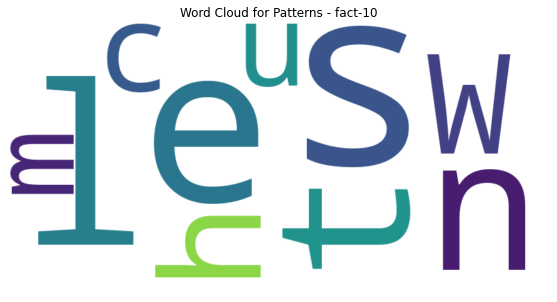

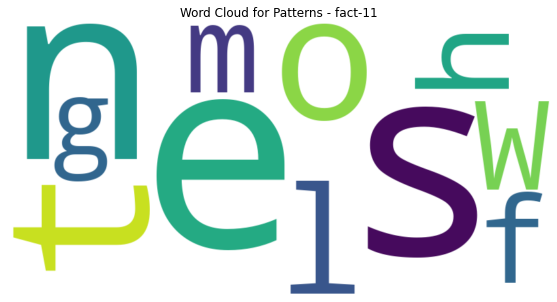

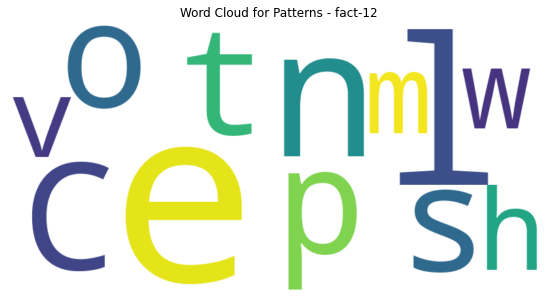

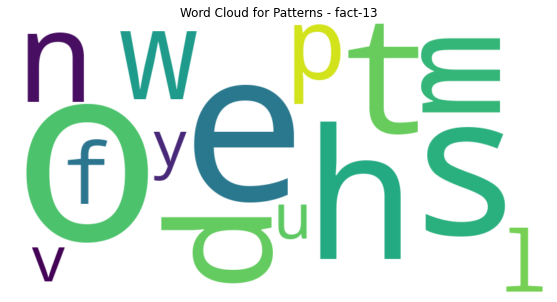

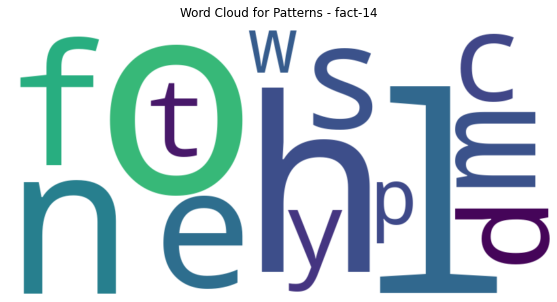

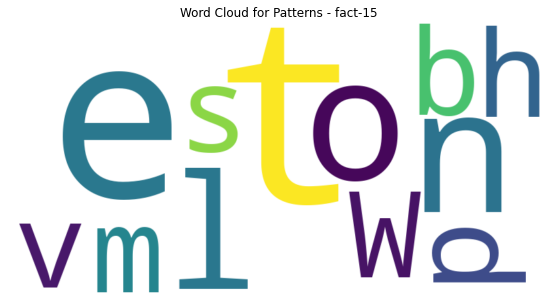

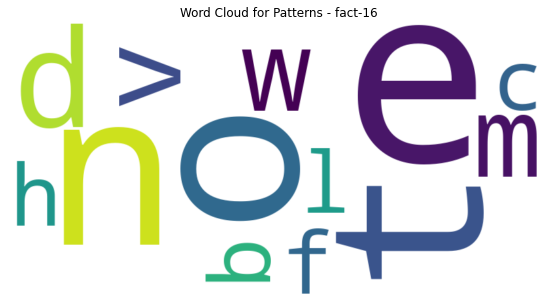

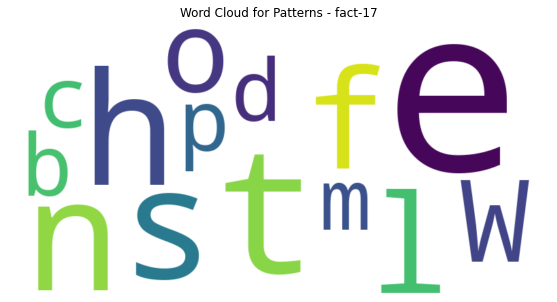

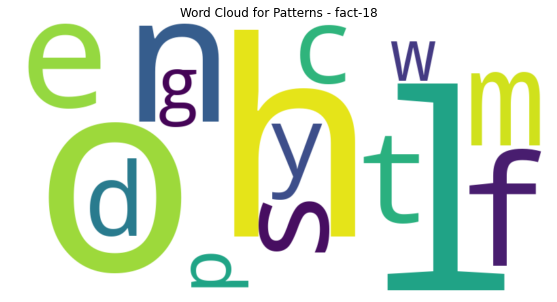

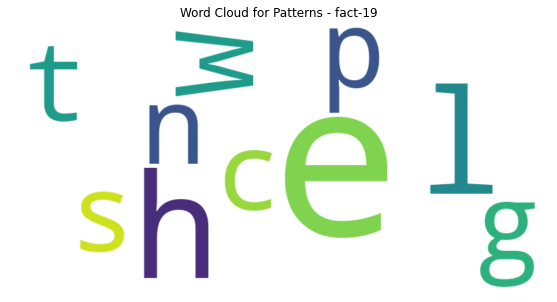

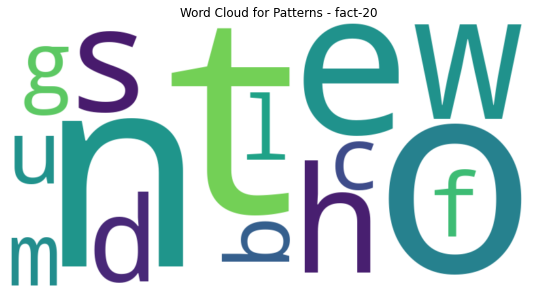

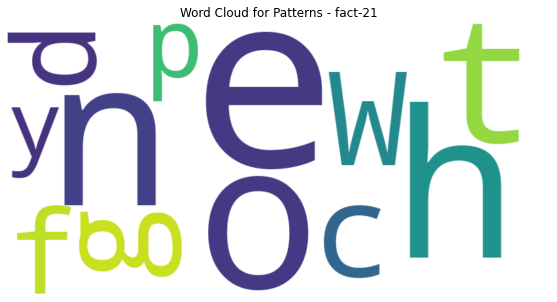

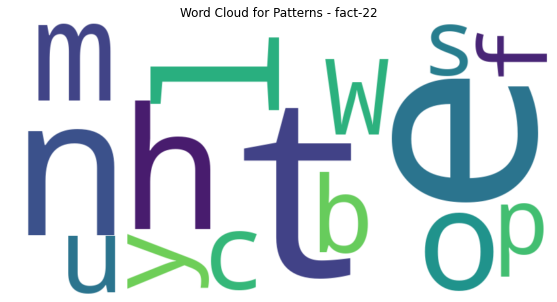

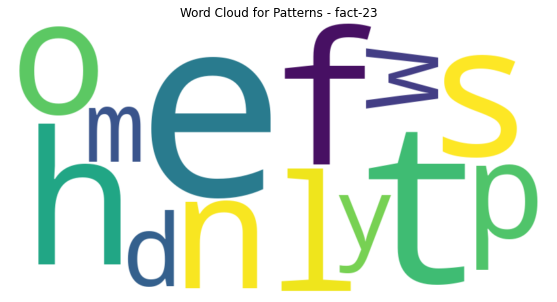

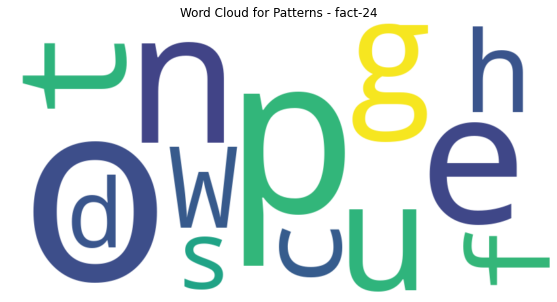

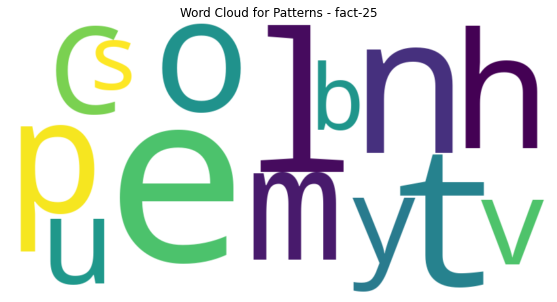

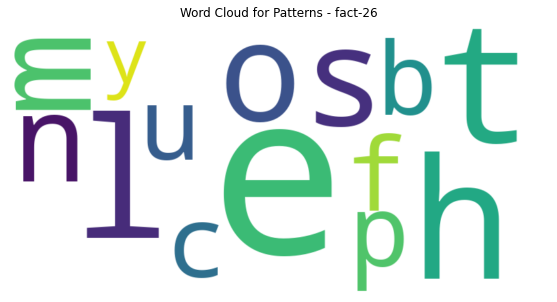

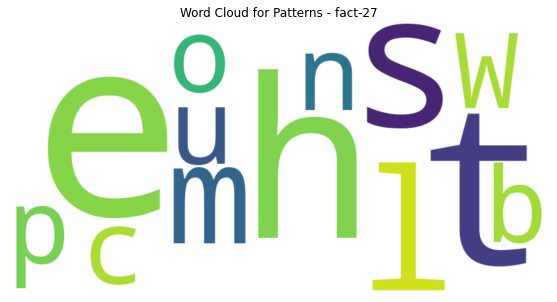

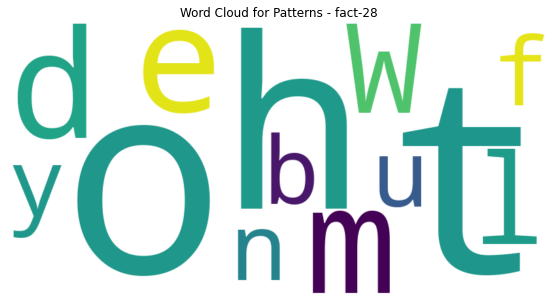

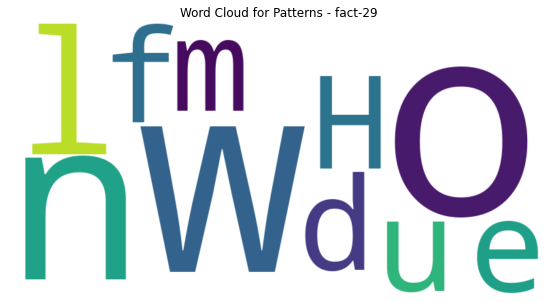

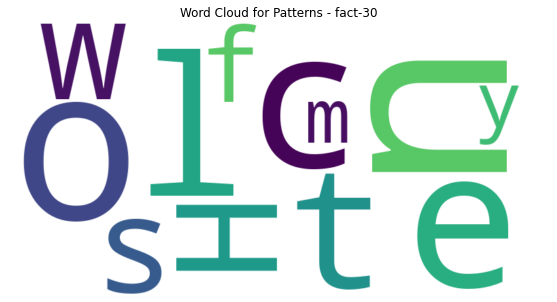

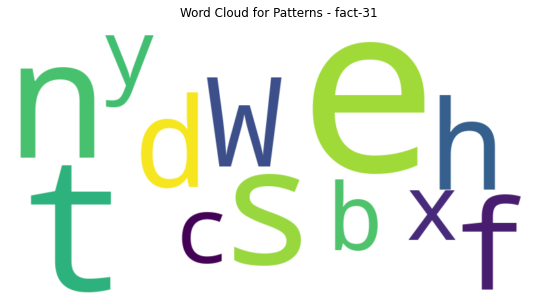

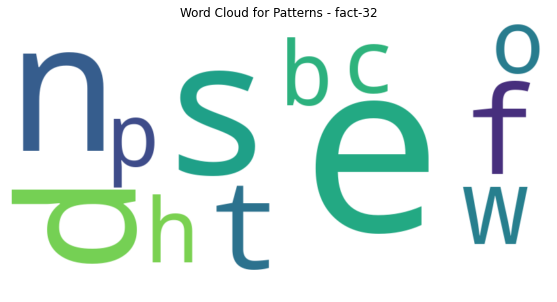

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word Clouds for Patterns
for intent in df['tag'].unique():
    patterns = df[df['tag'] == intent]['patterns'].str.join(' ')
    # Check if there are any patterns before generating word cloud
    if patterns.any():
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(patterns))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Patterns - {intent}')
        plt.axis('off')
        plt.show()
    else:
        print(f"No patterns found for intent: {intent}")

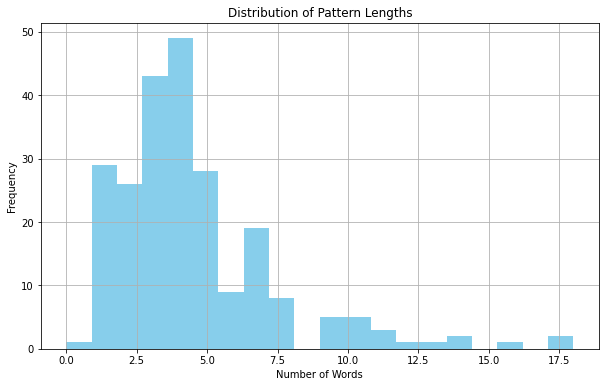

In [9]:
# Histogram of Pattern Lengths
plt.figure(figsize=(10, 6))
plt.hist(df['patterns'].apply(lambda x: len(x.split())), bins=20, color='skyblue')
plt.title('Distribution of Pattern Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

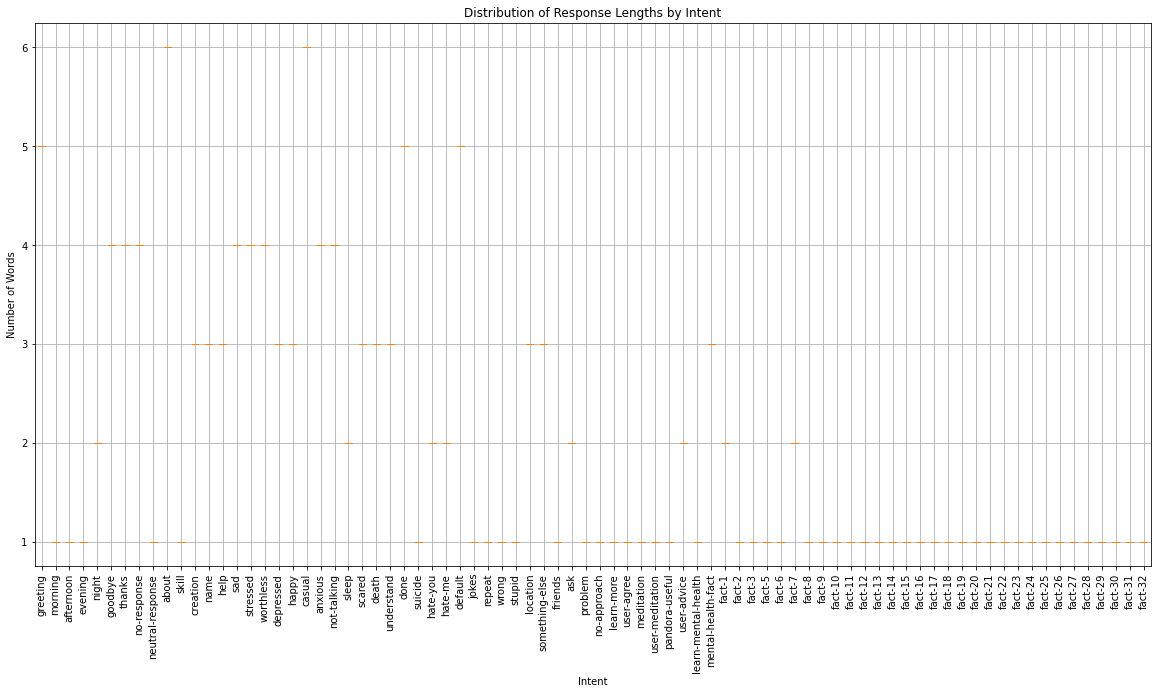

In [10]:
# Box Plot of Response Lengths
plt.figure(figsize=(20, 10))
plt.boxplot([df[df['tag'] == intent]['response_count'] for intent in df['tag'].unique()], labels=df['tag'].unique())
plt.title('Distribution of Response Lengths by Intent')
plt.xlabel('Intent')
plt.ylabel('Number of Words')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

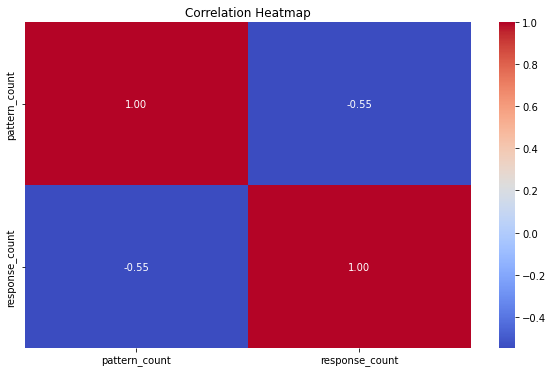

In [11]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['pattern_count', 'response_count']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Intent Prediction Model**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import plotly.graph_objects as go

In [13]:
# Split the dataset into training and testing sets
X = df['patterns']
y = df['tag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Support Vector Machine (SVM) classifier
model = SVC()
model.fit(X_train_vec, y_train)

# Predict intents for the testing set
y_pred = model.predict(X_test_vec)

# Evaluate the model's performance
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Convert float values in the report to dictionaries
report = {label: {metric: report[label][metric] for metric in report[label]} for label in report if isinstance(report[label], dict)}

# Extract evaluation metrics
labels = list(report.keys())
evaluation_metrics = ['precision', 'recall', 'f1-score']
metric_scores = {metric: [report[label][metric] for label in labels if label in report] for metric in evaluation_metrics}

# Visualize the model's performance using a Plotly bar plot
fig = go.Figure()
for metric in evaluation_metrics:
    fig.add_trace(go.Bar(name=metric, x=labels, y=metric_scores[metric]))

fig.update_layout(title='Intent Prediction Model Performance',
                  xaxis_title='Intent',
                  yaxis_title='Score',
                  barmode='group')

fig.show()

In [14]:
print("Evaluation Metrics Scores:")
for metric, scores in metric_scores.items():
    avg_score = sum(scores) / len(scores)
    print(f"{metric.capitalize()}: {avg_score:.2f}")

Evaluation Metrics Scores:
Precision: 0.08
Recall: 0.06
F1-score: 0.06


**Prediction Model Deployment**

In [ ]:
# Function to predict intents based on user input
def predict_intent(user_input):
    # Vectorize the user input
    user_input_vec = vectorizer.transform([user_input])

    # Predict the intent
    intent = model.predict(user_input_vec)[0]

    return intent

# Function to generate responses based on predicted intents
def generate_response(intent):
    # Implement your logic here to generate appropriate responses based on the predicted intents
    if intent == 'greeting':
        response = "Hello! How can I assist you today?"
    elif intent == 'farewell':
        response = "Goodbye! Take care."
    elif intent == 'question':
        response = "I'm sorry, I don't have the information you're looking for."
    else:
        response = "I'm here to help. Please let me know how I can assist you."

    return response

# Example usage
while True:
    # Get user input
    user_input = input("User: ")

    # Predict intent
    intent = predict_intent(user_input)

    # Generate response
    response = generate_response(intent)

    print("Chatbot:", response)